# Data Preprocessing

In [1]:
import pandas as pd

train_df = pd.read_csv('Cargo Volume - Train.csv')
test_df = pd.read_csv('Cargo Volume - Test.csv')

train_df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420


In [2]:
test_df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type
0,200907,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Mail,Passenger
1,202001,Nippon Cargo Airlines,KZ,Nippon Cargo Airlines,KZ,International,Asia,Deplaned,Cargo,Freighter
2,201107,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Cargo,Passenger
3,201809,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Cargo,Passenger
4,200811,China Cargo Airlines,CK,China Cargo Airlines,CK,International,Asia,Enplaned,Cargo,Freighter


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27230 entries, 0 to 27229
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              27230 non-null  int64  
 1   Operating Airline            27230 non-null  object 
 2   Operating Airline IATA Code  27199 non-null  object 
 3   Published Airline            27230 non-null  object 
 4   Published Airline IATA Code  27199 non-null  object 
 5   GEO Summary                  27230 non-null  object 
 6   GEO Region                   27230 non-null  object 
 7   Activity Type Code           27230 non-null  object 
 8   Cargo Type Code              27230 non-null  object 
 9   Cargo Aircraft Type          27230 non-null  object 
 10  Cargo Metric TONS            27230 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 2.3+ MB


In [4]:
train_df.describe()

,Activity Period,Cargo Metric TONS
count,27230.000000,27230.000000
mean,201277.964378,216.669953
std,451.796120,432.731356
min,200507.000000,0.000454
25%,200904.000000,8.446826
50%,201303.000000,60.774235
75%,201703.000000,247.236041
max,202012.000000,10801.278330


In [5]:
# Convert activity period to a string to then slice it 
train_df['Activity Period'] = train_df['Activity Period'].astype(str)
test_df['Activity Period'] = test_df['Activity Period'].astype(str)

# Gets the month and year from the activity period column
def time_split(df):
    df['Year'] = df['Activity Period'].str.slice(0, 4).astype(int)
    df['Month'] = df['Activity Period'].str.slice(4, 6).astype(int)

time_split(train_df)
time_split(test_df)

# Drop activity period
train_df = train_df.drop(['Activity Period'], axis=1)
test_df = test_df.drop(['Activity Period'], axis=1)

In [6]:
train_df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,Year,Month
0,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509,2016,1
1,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194,2008,11
2,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999,2007,9
3,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530,2016,8
4,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420,2017,8
...,...,...,...,...,...,...,...,...,...,...,...,...
27225,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690,2011,8
27226,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669,2007,3
27227,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941,2012,4
27228,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090,2010,5


In [7]:
test_df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Year,Month
0,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Mail,Passenger,2009,7
1,Nippon Cargo Airlines,KZ,Nippon Cargo Airlines,KZ,International,Asia,Deplaned,Cargo,Freighter,2020,1
2,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Cargo,Passenger,2011,7
3,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Cargo,Passenger,2018,9
4,China Cargo Airlines,CK,China Cargo Airlines,CK,International,Asia,Enplaned,Cargo,Freighter,2008,11
...,...,...,...,...,...,...,...,...,...,...,...
6802,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Mail,Passenger,2016,3
6803,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Cargo,Passenger,2019,10
6804,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Mail,Passenger,2015,3
6805,World Airways,WO,World Airways,WO,Domestic,US,Enplaned,Cargo,Freighter,2010,9


In [8]:
import numpy as np

# Convert month into sin and cos
def feature_sin_cos(df):
    df['month_sin'] = np.sin(df.Month * 2 * np.pi / 12)
    df['month_cos'] = np.cos(df.Month * 2 * np.pi / 12)

feature_sin_cos(train_df)
feature_sin_cos(test_df)

In [9]:
train_df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,Year,Month,month_sin,month_cos
0,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509,2016,1,0.500000,8.660254e-01
1,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194,2008,11,-0.500000,8.660254e-01
2,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999,2007,9,-1.000000,-1.836970e-16
3,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530,2016,8,-0.866025,-5.000000e-01
4,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420,2017,8,-0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690,2011,8,-0.866025,-5.000000e-01
27226,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669,2007,3,1.000000,6.123234e-17
27227,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941,2012,4,0.866025,-5.000000e-01
27228,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090,2010,5,0.500000,-8.660254e-01


In [10]:
test_df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Year,Month,month_sin,month_cos
0,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Mail,Passenger,2009,7,-5.000000e-01,-8.660254e-01
1,Nippon Cargo Airlines,KZ,Nippon Cargo Airlines,KZ,International,Asia,Deplaned,Cargo,Freighter,2020,1,5.000000e-01,8.660254e-01
2,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Cargo,Passenger,2011,7,-5.000000e-01,-8.660254e-01
3,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Cargo,Passenger,2018,9,-1.000000e+00,-1.836970e-16
4,China Cargo Airlines,CK,China Cargo Airlines,CK,International,Asia,Enplaned,Cargo,Freighter,2008,11,-5.000000e-01,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Mail,Passenger,2016,3,1.000000e+00,6.123234e-17
6803,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Cargo,Passenger,2019,10,-8.660254e-01,5.000000e-01
6804,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Mail,Passenger,2015,3,1.000000e+00,6.123234e-17
6805,World Airways,WO,World Airways,WO,Domestic,US,Enplaned,Cargo,Freighter,2010,9,-1.000000e+00,-1.836970e-16


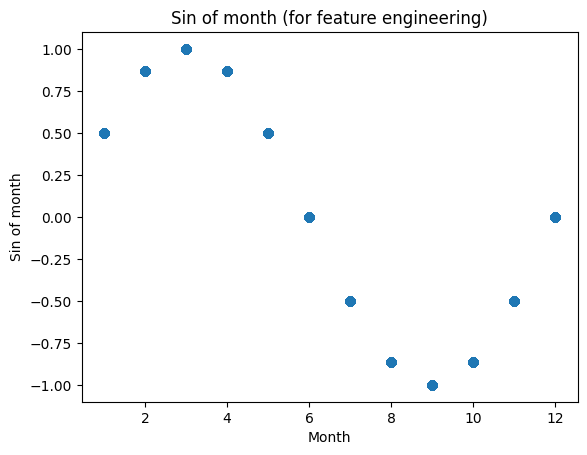

In [11]:
import matplotlib.pyplot as plt

plt.scatter(train_df.Month, train_df.month_sin)
plt.xlabel('Month')
plt.ylabel('Sin of month')
plt.title('Sin of month (for feature engineering)')
plt.show()

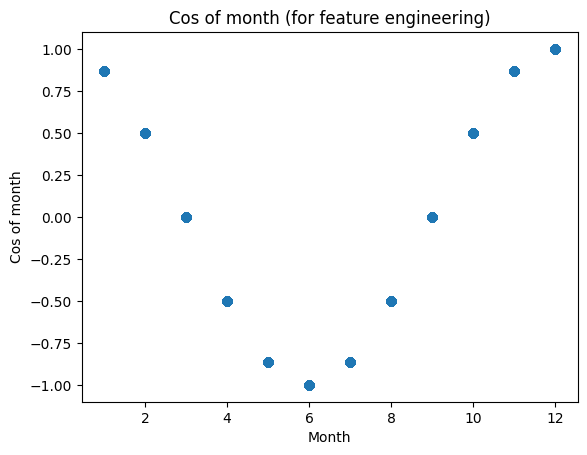

In [12]:
plt.scatter(train_df.Month, train_df.month_cos)
plt.xlabel('Month')
plt.ylabel('Cos of month')
plt.title('Cos of month (for feature engineering)')
plt.show()

In [13]:
train_df = train_df.drop(['Month'], axis=1)
test_df = test_df.drop(['Month'], axis=1)

In [14]:
train_df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,Year,month_sin,month_cos
0,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509,2016,0.500000,8.660254e-01
1,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194,2008,-0.500000,8.660254e-01
2,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999,2007,-1.000000,-1.836970e-16
3,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530,2016,-0.866025,-5.000000e-01
4,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420,2017,-0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690,2011,-0.866025,-5.000000e-01
27226,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669,2007,1.000000,6.123234e-17
27227,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941,2012,0.866025,-5.000000e-01
27228,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090,2010,0.500000,-8.660254e-01


In [15]:
test_df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Year,month_sin,month_cos
0,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Mail,Passenger,2009,-5.000000e-01,-8.660254e-01
1,Nippon Cargo Airlines,KZ,Nippon Cargo Airlines,KZ,International,Asia,Deplaned,Cargo,Freighter,2020,5.000000e-01,8.660254e-01
2,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Cargo,Passenger,2011,-5.000000e-01,-8.660254e-01
3,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Cargo,Passenger,2018,-1.000000e+00,-1.836970e-16
4,China Cargo Airlines,CK,China Cargo Airlines,CK,International,Asia,Enplaned,Cargo,Freighter,2008,-5.000000e-01,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
6802,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Mail,Passenger,2016,1.000000e+00,6.123234e-17
6803,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Cargo,Passenger,2019,-8.660254e-01,5.000000e-01
6804,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Mail,Passenger,2015,1.000000e+00,6.123234e-17
6805,World Airways,WO,World Airways,WO,Domestic,US,Enplaned,Cargo,Freighter,2010,-1.000000e+00,-1.836970e-16


# Dealing with missing columns in test and train when one hot encoding

After one hot encoding train and test seperately, there was around 10 columns missing from test that were in train, and 5 columns that were in test but not in train. To deal with this, I will concatenate both datasets, one hot encode them, and then split back into train and test.

In [16]:
columns = ["Operating Airline", "Operating Airline IATA Code", "Published Airline", "Published Airline IATA Code",
                 "GEO Summary", "GEO Region", "Activity Type Code", "Cargo Type Code", "Cargo Aircraft Type"]

# Add a dataset column to distinguish between training and test data
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'

combined_data = pd.concat([train_df, test_df], axis=0)
combined_data = pd.get_dummies(combined_data, columns=columns)

# Split the combined dataset back into train and test
train_data = combined_data[combined_data['dataset'] == 'train'].drop(columns=['dataset'])
test_data = combined_data[combined_data['dataset'] == 'test'].drop(columns=['dataset'])

In [17]:
train_data

,Cargo Metric TONS,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,8.871509,2016,0.500000,8.660254e-01,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,True
1,53.946194,2008,-0.500000,8.660254e-01,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
2,0.043999,2007,-1.000000,-1.836970e-16,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,19.023530,2016,-0.866025,-5.000000e-01,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4,6.951420,2017,-0.866025,-5.000000e-01,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,5.687690,2011,-0.866025,-5.000000e-01,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
27226,3.473669,2007,1.000000,6.123234e-17,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
27227,18.564941,2012,0.866025,-5.000000e-01,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
27228,9.814090,2010,0.500000,-8.660254e-01,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [18]:
test_data

,Cargo Metric TONS,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,NaN,2009,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
1,NaN,2020,5.000000e-01,8.660254e-01,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,NaN,2011,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,NaN,2018,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
4,NaN,2008,-5.000000e-01,8.660254e-01,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,NaN,2016,1.000000e+00,6.123234e-17,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
6803,NaN,2019,-8.660254e-01,5.000000e-01,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
6804,NaN,2015,1.000000e+00,6.123234e-17,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
6805,NaN,2010,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,True,False


In [19]:
train_data.isna().sum()

Cargo Metric TONS                0
Year                             0
month_sin                        0
month_cos                        0
Operating Airline_ABX Air        0
                                ..
Cargo Type Code_Express          0
Cargo Type Code_Mail             0
Cargo Aircraft Type_Combi        0
Cargo Aircraft Type_Freighter    0
Cargo Aircraft Type_Passenger    0
Length: 375, dtype: int64

In [20]:
test_data.isna().sum()

Cargo Metric TONS                6807
Year                                0
month_sin                           0
month_cos                           0
Operating Airline_ABX Air           0
                                 ... 
Cargo Type Code_Express             0
Cargo Type Code_Mail                0
Cargo Aircraft Type_Combi           0
Cargo Aircraft Type_Freighter       0
Cargo Aircraft Type_Passenger       0
Length: 375, dtype: int64

In [21]:
train_target = train_data['Cargo Metric TONS']
train_features = train_data.drop(columns='Cargo Metric TONS')

In [22]:
train_features

,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,2016,0.500000,8.660254e-01,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,True
1,2008,-0.500000,8.660254e-01,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
2,2007,-1.000000,-1.836970e-16,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2016,-0.866025,-5.000000e-01,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4,2017,-0.866025,-5.000000e-01,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,2011,-0.866025,-5.000000e-01,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
27226,2007,1.000000,6.123234e-17,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
27227,2012,0.866025,-5.000000e-01,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
27228,2010,0.500000,-8.660254e-01,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True


In [23]:
train_target

0          8.871509
1         53.946194
2          0.043999
3         19.023530
4          6.951420
            ...    
27225      5.687690
27226      3.473669
27227     18.564941
27228      9.814090
27229    525.214368
Name: Cargo Metric TONS, Length: 27230, dtype: float64

In [24]:
test_data.drop(columns='Cargo Metric TONS', inplace=True)

test_data

,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,2009,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
1,2020,5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,2011,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,2018,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
4,2008,-5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,2016,1.000000e+00,6.123234e-17,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
6803,2019,-8.660254e-01,5.000000e-01,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
6804,2015,1.000000e+00,6.123234e-17,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
6805,2010,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,True,False


In [25]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

In [26]:
train_x

,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
1174,2017,1.224647e-16,-1.000000e+00,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
22809,2013,5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
22404,2009,8.660254e-01,5.000000e-01,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
24367,2020,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
23248,2017,-2.449294e-16,1.000000e+00,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2014,8.660254e-01,-5.000000e-01,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,True,False
5390,2019,5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
860,2010,-8.660254e-01,-5.000000e-01,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,True
15795,2005,-2.449294e-16,1.000000e+00,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [27]:
val_x

,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
21899,2006,5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
3547,2011,-5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
2275,2020,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
8460,2012,-2.449294e-16,1.000000e+00,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
16372,2019,-5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,2006,5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
24848,2017,5.000000e-01,8.660254e-01,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
1026,2017,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
3559,2015,8.660254e-01,5.000000e-01,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


In [28]:
val_y

21899    376.232623
3547      25.177522
2275      42.699182
8460       5.012734
16372    441.447149
            ...    
3233     278.623346
24848     29.063513
1026     239.418245
3559       6.220217
21692    405.443556
Name: Cargo Metric TONS, Length: 5446, dtype: float64

In [29]:
train_y

1174      144.388591
22809     105.434330
22404      10.226866
24367      20.658305
23248     395.105558
            ...     
21575    1202.239130
5390      106.685359
860        66.431534
15795       5.974366
23654      96.815023
Name: Cargo Metric TONS, Length: 21784, dtype: float64

In [30]:
test_x = test_data

In [31]:
test_x

,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,2009,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
1,2020,5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,2011,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,2018,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
4,2008,-5.000000e-01,8.660254e-01,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,2016,1.000000e+00,6.123234e-17,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
6803,2019,-8.660254e-01,5.000000e-01,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
6804,2015,1.000000e+00,6.123234e-17,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
6805,2010,-1.000000e+00,-1.836970e-16,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,True,False


# Model Evaluations

The metric that I will use to assess my models' performance is RMSE. I believe this is the best metric because we are dealing with a regression problem where the target variable is continuous (cargo metrics tons). My models aim to predict a numeric value, and RMSE measures how well each model's predictions align with the actual metric tons of cargo. RMSE is also sensitive to the magnitude of errors, which will be useful for this problem, since larger error values may not be as helpful in seeing how far off/close the models predictions will be for a relatively smaller value.

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [33]:
lr_mse = mean_squared_error(val_y, reg.predict(val_x))
lr_rmse = np.sqrt(lr_mse)
lr_rmse

322.92817555099646

## KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_x, train_y)

KNeighborsRegressor()

In [35]:
knn_mse = mean_squared_error(val_y, knn.predict(val_x))
knn_rmse = np.sqrt(knn_mse)
knn_rmse

127.57223346301842

## LASSO

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

folds = 5
params = {'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}
lasso = Lasso(alpha=params)
lasso_cv_reg = GridSearchCV(lasso, params, cv=folds)
lasso_cv_reg.fit(train_x, train_y)

/home/mluba/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.554e+08, tolerance: 3.181e+05
  model = cd_fast.enet_coordinate_descent(
/home/mluba/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.683e+08, tolerance: 3.327e+05
  model = cd_fast.enet_coordinate_descent(
/home/mluba/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+

GridSearchCV(cv=5,
             estimator=Lasso(alpha={'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}),
             param_grid={'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]})

In [37]:
lasso_cv_reg.best_params_

{'alpha': 0.001}

In [38]:
lasso_mse = mean_squared_error(val_y, lasso_cv_reg.predict(val_x))
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

322.9208586518282

## Ridge

In [39]:
from sklearn.linear_model import Ridge

folds = 5
params = {'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge(alpha=params)
ridge_reg = GridSearchCV(ridge, params, cv=folds)
ridge_reg.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=Ridge(alpha={'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}),
             param_grid={'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]})

In [40]:
ridge_mse = mean_squared_error(val_y, ridge_reg.predict(val_x))
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

322.79971361334566

## CART

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(train_x, train_y)

DecisionTreeRegressor()

In [42]:
folds = 5
params = {'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae', 'poisson'], 
          'max_depth': [2,3,4,5,6,7,8]}

cart = DecisionTreeRegressor()
cart_reg = GridSearchCV(cart, params, cv=folds)
cart_reg.fit(train_x, train_y)

/home/mluba/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mluba/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mluba/.local/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/mluba/.local/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/mluba/.local/lib/pyt

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [43]:
cart_reg.best_params_

{'criterion': 'poisson', 'max_depth': 8}

In [44]:
cart_reg.best_score_

0.782296713820482

In [45]:
cart_mse = mean_squared_error(val_y, cart_reg.predict(val_x))
cart_rmse = np.sqrt(cart_mse)
cart_rmse

174.00290054720378

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

folds = 5
params_rf = {'criterion': ['poisson'],
             'max_depth': [9,10,11,12,13,14,15],
             'n_estimators': [20,30,40,50,60,70,80,90,100],
             'n_jobs': [-1]}

rf = RandomForestRegressor()
rf_reg = GridSearchCV(rf, params_rf, cv=folds)
rf_reg.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson'],
                         'max_depth': [9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_jobs': [-1]})

In [47]:
rf_mse = mean_squared_error(val_y, rf_reg.predict(val_x))
rf_rmse = np.sqrt(rf_mse)
rf_rmse

111.3358734430527

In [48]:
rf_reg.best_params_

{'criterion': 'poisson', 'max_depth': 15, 'n_estimators': 20, 'n_jobs': -1}

In [49]:
rf_reg.best_score_

0.8745899009031846

## XGBoost

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_x_norm = pd.DataFrame(scaler.fit_transform(train_x), index=train_x.index,
                           columns=train_x.columns)
train_x_norm

,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
1174,0.943475,0.032636,-1.423559,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,1.654054,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
22809,0.059442,0.740387,1.214527,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
22404,-0.824591,1.258497,0.697060,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,-1.020219,1.020219,-1.099899,-0.382393,1.441274,-0.109048,-0.429976,0.449011
24367,1.606500,-1.382867,-0.009813,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,0.980182,-0.980182,-1.099899,2.615108,-0.693831,-0.109048,-0.429976,0.449011
23248,0.943475,0.032636,1.403933,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.280450,1.258497,-0.716686,11.699291,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,1.654054,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,2.325714,-2.227118
5390,1.385492,0.740387,1.214527,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,-1.020219,1.020219,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
860,-0.603583,-1.193225,-0.716686,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,1.654054,-1.020219,1.020219,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
15795,-1.708624,0.032636,1.403933,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011


In [51]:
val_x_norm = pd.DataFrame(scaler.transform(val_x), index=val_x.index,
                           columns=val_x.columns)
val_x_norm.head()

,Year,month_sin,month_cos,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
21899,-1.487616,0.740387,-1.234153,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
3547,-0.382574,-0.675115,1.214527,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,1.654054,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
2275,1.606500,-0.675115,-1.234153,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,0.980182,-0.980182,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
8460,-0.161566,0.032636,1.403933,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,-1.020219,1.020219,0.909174,-0.382393,-0.693831,-0.109048,-0.429976,0.449011
16372,1.385492,-0.675115,1.214527,-0.085475,-0.02033,-0.03775,-0.082142,-0.017929,-0.038355,-0.172432,...,-0.052554,-0.604575,-1.020219,1.020219,-1.099899,-0.382393,1.441274,-0.109048,-0.429976,0.449011


In [52]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_x, train_y)
dval = xgb.DMatrix(val_x, val_y)

In [53]:
params = {'objective': 'reg:squarederror',
          'learning_rate': 0.5,
          'max_depth': 7,
          'subsample': 1,          # Bagging -- pick rows
          'colsample_bytree': 0.8, # Random forest -- pick columns
          'reg_alpha': 0.2,        # LASSO
          'reg_lambda': 0.1,       # Ridge
          'gamma': 0.5,             # Total regularization
          'num_parallel_tree': 10,
          'n_jobs': 6,
}

results = xgb.cv(
    params, dtrain,
    num_boost_round=160,
    early_stopping_rounds = 20,
    nfold=10,
    metrics=['rmse'],
    verbose_eval=15)

[0]	train-rmse:302.96655+2.87630	test-rmse:306.28207+30.88875
[15]	train-rmse:152.10128+4.36007	test-rmse:172.56437+36.44422
[30]	train-rmse:132.38757+3.90333	test-rmse:159.19485+37.94466
[45]	train-rmse:117.66509+3.66704	test-rmse:151.50721+39.54295
[60]	train-rmse:107.17606+4.21087	test-rmse:146.66243+39.69455
[75]	train-rmse:96.95441+3.56853	test-rmse:143.99714+40.74887
[90]	train-rmse:87.35931+3.07476	test-rmse:141.54761+40.92184
[105]	train-rmse:80.91428+2.71841	test-rmse:139.53360+41.61938
[120]	train-rmse:74.54675+2.50741	test-rmse:138.15640+41.74555
[135]	train-rmse:70.06732+2.43056	test-rmse:137.91583+41.54912
[150]	train-rmse:65.65787+2.49796	test-rmse:137.43450+41.70941
[159]	train-rmse:63.53131+2.57752	test-rmse:137.28061+41.81686


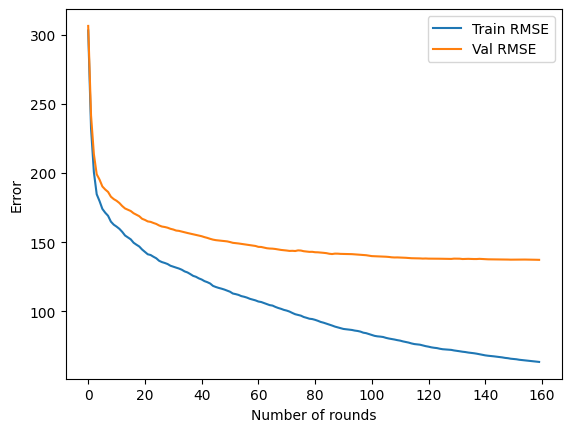

In [54]:
plt.plot(results.iloc[:,0], label='Train RMSE')
plt.plot(results.iloc[:,2], label='Val RMSE')
plt.xlabel('Number of rounds')
plt.ylabel('Error')
plt.legend()
plt.show()

## Model Selection

I will chose Random Forest since it produced the lowest RMSE at around 111.

In [56]:
# Retrain model
folds = 5
params_rf = {'criterion': ['poisson'],
             'max_depth': [9,10,11,12,13,14,15],
             'n_estimators': [20,30,40,50,60,70,80,90,100],
             'n_jobs': [-1]}

rf = RandomForestRegressor()
rf_reg = GridSearchCV(rf, params_rf, cv=folds)
rf_reg.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson'],
                         'max_depth': [9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_jobs': [-1]})

In [57]:
test_y = rf_reg.predict(test_x)

In [58]:
test_y

array([ 53.78482151, 284.72339859, 169.96367428, ...,   6.14277707,
       553.82370456,  35.92043496])

In [59]:
predictions_df = pd.DataFrame({'Cargo Metric TONS': test_y})
predictions_df.to_csv('dc1.csv', index=False)

In [60]:
predictions_df.describe()

,Cargo Metric TONS
count,6807.000000
mean,219.264351
std,411.642878
min,0.013341
25%,16.613077
50%,84.989210
75%,257.062914
max,5448.460010
